In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os

In [2]:
dt=pd.read_csv('C:\Project\Loanpredict\loanpredict.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Project\\Loanpredict\\loanpredict.csv'

In [ ]:
dt.head(2)

In [ ]:
dt.shape

In [ ]:
dt.isnull().sum()

In [ ]:
dt.duplicated().sum()

In [ ]:
dt=dt.drop_duplicates()

In [ ]:
dt.duplicated().sum()

In [ ]:
dt.shape

In [ ]:
dt=dt.drop(['City', 'CCSC', 'Zip'], axis=1)

In [ ]:
sns.heatmap(dt.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
dt=dt.drop(['ChgOffDate'], axis=1)

In [ ]:
dt.shape

In [ ]:
dt.isnull().sum()

In [ ]:
dt=dt.dropna()

In [ ]:
dt.isnull().sum()

In [ ]:
dt.shape

In [ ]:
dt.info()

In [ ]:
dt=dt.replace({'DisbursementGross': '[$,]',
             'BalanceGross': '[$,]',
             'ChgOffPrinGr':'[$,]',
             'GrAppv': '[$,]',
             'SBA_Appv':'[$,]'},
              '', regex=True)

In [ ]:
dt['DisbursementGross'].unique()

In [ ]:
dt.dtypes

In [ ]:
dt['DisbursementGross']=pd.to_numeric(dt['DisbursementGross'])

In [ ]:
dt['DisbursementGross']=dt['DisbursementGross'].astype(int)

In [ ]:
dt['BalanceGross']=pd.to_numeric(dt['BalanceGross'])

In [ ]:
dt['BalanceGross']=dt['BalanceGross'].astype(int)

In [ ]:
dt['ChgOffPrinGr']=pd.to_numeric(dt['ChgOffPrinGr'])

In [ ]:
dt['ChgOffPrinGr']=dt['ChgOffPrinGr'].astype(int)

In [ ]:
dt['GrAppv']=pd.to_numeric(dt['GrAppv'])

In [ ]:
dt['GrAppv']=dt['GrAppv'].astype(int)

In [ ]:
dt['SBA_Appv']=pd.to_numeric(dt['SBA_Appv'])

In [ ]:
dt['SBA_Appv']=dt['SBA_Appv'].astype(int)

In [ ]:
dt.dtypes

In [ ]:
dt['RevLineCr'].unique()

In [ ]:
dt['RevLineCr']=dt['RevLineCr'].replace('[0T`,1]', np.NaN, regex=True)

In [ ]:
dt['RevLineCr'].unique()

In [ ]:
dt['RevLineCr']=dt['RevLineCr'].fillna(dt['RevLineCr'].mode()[0])

In [ ]:
dt['RevLineCr'].unique()

In [ ]:
dt['LowDoc'].unique()

In [ ]:
dt['LowDoc'].mode()[0]

In [ ]:
dt['LowDoc'].value_counts()

In [ ]:
dt['LowDoc']=dt['LowDoc'].replace('[C1]', 'N', regex=True)

In [ ]:
dt['LowDoc'].value_counts()

In [ ]:
dt['MIS_Status'].isnull().sum()

In [ ]:
dt['MIS_Status'].unique()

In [ ]:
dt['RevLineCr']=dt['RevLineCr'].map({'Y':int(1), 'N':int(0)})

In [ ]:
dt['RevLineCr'].value_counts()

In [ ]:
dt['LowDoc'].value_counts()

In [ ]:
dt['LowDoc']=dt['LowDoc'].map({'Y':int(1), 'N':int(0)})

In [ ]:
dt['LowDoc'].value_counts()

In [ ]:
dt['MIS_Status']=dt['MIS_Status'].map({'P I F': int(1), 'CHGOFF': int(0)})

In [ ]:
dt['MIS_Status'].value_counts()

In [ ]:
dt.dtypes

In [ ]:
dt['Term'].unique()

In [ ]:
dt['Term'].value_counts()

In [ ]:
dt['Term'] = np.where(dt['Term'] >250 , dt['Term'].mode()[0], dt['Term'])

In [ ]:
dt['Term'] = np.where(dt['Term'] < 12, 36, dt['Term'])

In [ ]:
dt['NoEmp'].describe()

In [ ]:
dt['NoEmp'].value_counts()

In [77]:
dt['NoEmp'] = np.where(dt['NoEmp'] >20 , 15, dt['NoEmp'])

In [78]:
dt['CreateJob'].describe()

count    148785.000000
mean          1.282360
std          10.991817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        3000.000000
Name: CreateJob, dtype: float64

In [79]:
dt['CreateJob'] = np.where(dt['CreateJob'] > 8 , 0, dt['CreateJob'])

In [80]:
dt['RetainedJob'].value_counts()

0      65456
1      18444
2      15359
3      10179
4       7983
       ...  
230        1
104        1
165        1
233        1
220        1
Name: RetainedJob, Length: 167, dtype: int64

In [81]:
dt['RetainedJob'] = np.where(dt['RetainedJob'] > 46, dt['RetainedJob'].mode(),dt['RetainedJob'])

# Handling outliers

(array([1.15027e+05, 1.78010e+04, 6.52900e+03, 3.74300e+03, 2.10700e+03,
        1.09100e+03, 1.17400e+03, 4.17000e+02, 2.63000e+02, 2.37000e+02,
        1.23000e+02, 7.00000e+01, 1.55000e+02, 1.70000e+01, 9.00000e+00,
        4.00000e+00, 3.00000e+00, 5.00000e+00, 2.00000e+00, 1.00000e+00,
        2.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([4.0000000e+03, 1.6502080e+05, 3.2604160e+05, 4.8706240e+05,
        6.4808320e+05, 8.0910400e+05, 9.7012480e+05, 1.1311456e+06,
        1.2921664e+06, 1.4531872e+06, 1.6142080e+06, 1.7752288e+06,
        1.9362496e+06, 2.0972704e+06, 2.2582912e+06, 2.4193120e+06,
        2.5803328e+06, 2.7413536e+06, 2.9023744e+06, 3.0633952e+06,
        3.2244160e+06, 3.3854368e+06, 3.5464576e+06, 3.7074784e+06,
        3.8684992e+06, 4.0295200e+06]),
 <BarContainer object of 25 artists>)

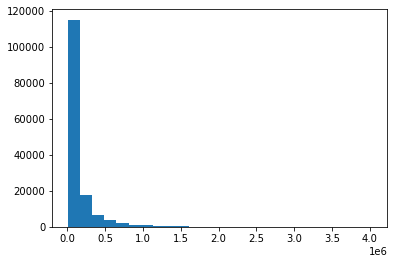

In [82]:
plt.hist(dt['DisbursementGross'], bins=25)

In [83]:
dt['DisbursementGross'].describe()

count    1.487850e+05
mean     1.420611e+05
std      2.190133e+05
min      4.000000e+03
25%      3.000000e+04
50%      6.649600e+04
75%      1.500000e+05
max      4.029520e+06
Name: DisbursementGross, dtype: float64

<AxesSubplot:xlabel='DisbursementGross'>

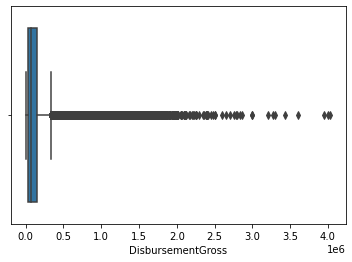

In [84]:
sns.boxplot(x=dt['DisbursementGross'])

In [85]:
dt['DisbursementGross'].value_counts()

50000     10198
25000      6978
100000     6964
10000      5600
35000      3089
          ...  
86523         1
166400        1
299587        1
43588         1
284683        1
Name: DisbursementGross, Length: 38221, dtype: int64

In [86]:
dt['DisbursementGross'] = np.where(dt['DisbursementGross'] >200000 , 
                                    dt['DisbursementGross'].mode()[0], dt['DisbursementGross'])

In [87]:
dt['DisbursementGross'] = np.where(dt['DisbursementGross'] < 5000 , 
                                    dt['DisbursementGross'].mode()[0], dt['DisbursementGross'])


In [88]:
dt['DisbursementGross'].describe()

count    148785.000000
mean      62035.118406
std       44043.663808
min        5000.000000
25%       30000.000000
50%       50000.000000
75%       81539.000000
max      200000.000000
Name: DisbursementGross, dtype: float64

In [89]:
dt['DisbursementGross'].value_counts()

50000     37988
25000      6978
100000     6964
10000      5600
35000      3089
          ...  
72818         1
81014         1
144535        1
152731        1
24588         1
Name: DisbursementGross, Length: 30804, dtype: int64

In [90]:
dt['GrAppv'].describe()

count    1.487850e+05
mean     1.282839e+05
std      2.146897e+05
min      1.000000e+03
25%      2.500000e+04
50%      5.000000e+04
75%      1.200000e+05
max      4.000000e+06
Name: GrAppv, dtype: float64

In [91]:
dt['GrAppv'].value_counts()

50000      17457
25000      13213
10000      12513
100000     11090
20000       5421
           ...  
909830         1
1217000        1
266680         1
1266000        1
153525         1
Name: GrAppv, Length: 5963, dtype: int64

<AxesSubplot:xlabel='GrAppv'>

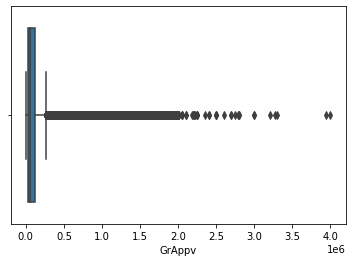

In [92]:
sns.boxplot(x=dt['GrAppv'])

In [93]:
dt['GrAppv'] = np.where(dt['GrAppv'] > 200000, dt['GrAppv'].mode()[0], dt['GrAppv'])

In [94]:
dt['GrAppv'] = np.where(dt['GrAppv'] < 5000 , dt['GrAppv'].mode()[0], dt['GrAppv'])

(array([17309., 11743., 15774., 11041.,  4412., 44747.,  1809.,  3558.,
         5634.,  2229.,  2477.,  1487., 11945.,   847.,  1178.,  1367.,
         1141.,  1077.,  2954.,   872.,   697.,  1041.,   713.,   720.,
         2013.]),
 array([  5000.,  12800.,  20600.,  28400.,  36200.,  44000.,  51800.,
         59600.,  67400.,  75200.,  83000.,  90800.,  98600., 106400.,
        114200., 122000., 129800., 137600., 145400., 153200., 161000.,
        168800., 176600., 184400., 192200., 200000.]),
 <BarContainer object of 25 artists>)

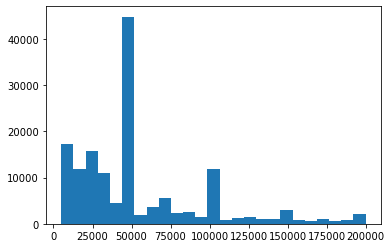

In [95]:
plt.hist(dt['GrAppv'], bins=25)

In [96]:
dt['SBA_Appv'].describe()

count    1.487850e+05
mean     9.288718e+04
std      1.667499e+05
min      5.000000e+02
25%      1.250000e+04
50%      2.500000e+04
75%      8.100000e+04
max      4.000000e+06
Name: SBA_Appv, dtype: float64

In [97]:
dt['SBA_Appv'].value_counts()

25000     15026
5000      11827
12500     10785
50000      7742
10000      4646
          ...  
62250         1
56111         1
35150         1
749873        1
151650        1
Name: SBA_Appv, Length: 8184, dtype: int64

<AxesSubplot:xlabel='SBA_Appv'>

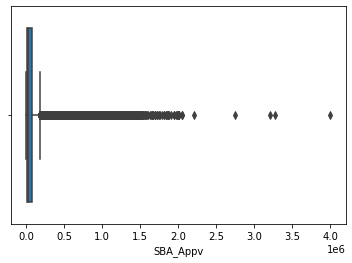

In [98]:
sns.boxplot(x=dt['SBA_Appv'])

(array([1.25534e+05, 1.19490e+04, 5.01400e+03, 2.71100e+03, 2.44300e+03,
        3.51000e+02, 3.49000e+02, 1.60000e+02, 8.00000e+01, 1.37000e+02,
        1.50000e+01, 1.20000e+01, 2.50000e+01, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([5.00000e+02, 1.60480e+05, 3.20460e+05, 4.80440e+05, 6.40420e+05,
        8.00400e+05, 9.60380e+05, 1.12036e+06, 1.28034e+06, 1.44032e+06,
        1.60030e+06, 1.76028e+06, 1.92026e+06, 2.08024e+06, 2.24022e+06,
        2.40020e+06, 2.56018e+06, 2.72016e+06, 2.88014e+06, 3.04012e+06,
        3.20010e+06, 3.36008e+06, 3.52006e+06, 3.68004e+06, 3.84002e+06,
        4.00000e+06]),
 <BarContainer object of 25 artists>)

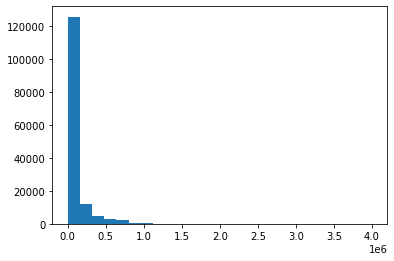

In [99]:
plt.hist(dt['SBA_Appv'], bins=25)

In [100]:
dt['SBA_Appv'].mode()[0]

25000

In [101]:
dt['SBA_Appv'] = np.where(dt['SBA_Appv'] > 175000 , dt['SBA_Appv'].mode()[0], dt['SBA_Appv'])

In [102]:
dt['SBA_Appv'] = np.where(dt['SBA_Appv'] <5000 , dt['SBA_Appv'].mode()[0], dt['SBA_Appv'])

(array([24311., 23112., 48666.,  4228.,  5618.,  5193., 10141.,  1639.,
         2737.,  1790.,  2755.,  3910.,  1126.,  1674.,  1035.,  1638.,
         1113.,  1201.,  1354.,   913.,   638.,  1651.,   705.,   570.,
         1067.]),
 array([  5000.,  11800.,  18600.,  25400.,  32200.,  39000.,  45800.,
         52600.,  59400.,  66200.,  73000.,  79800.,  86600.,  93400.,
        100200., 107000., 113800., 120600., 127400., 134200., 141000.,
        147800., 154600., 161400., 168200., 175000.]),
 <BarContainer object of 25 artists>)

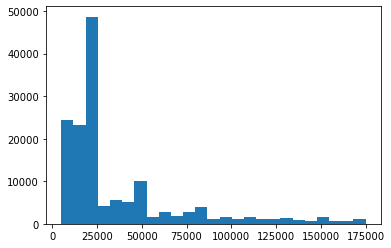

In [103]:
plt.hist(dt['SBA_Appv'], bins=25)

In [104]:
dt.dtypes

Name                 object
State                object
Bank                 object
BankState            object
ApprovalDate         object
ApprovalFY            int64
Term                  int64
NoEmp                 int64
NewExist              int64
CreateJob             int64
RetainedJob           int64
FranchiseCode         int64
UrbanRural            int64
RevLineCr             int64
LowDoc                int64
DisbursementDate     object
DisbursementGross     int32
BalanceGross          int32
MIS_Status            int64
ChgOffPrinGr          int32
GrAppv                int32
SBA_Appv              int32
dtype: object

# Handling DATE Column outliers

In [105]:
dt['ApprovalDate']=pd.to_datetime(dt['ApprovalDate'])

(array([2.4000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.9000e+01,
        1.2100e+02, 4.0700e+02, 6.6500e+02, 2.3370e+03, 1.2090e+03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 4.4579e+04, 1.9560e+03,
        3.5000e+01, 9.8000e+01, 3.8600e+02, 2.5700e+04, 7.1248e+04]),
 array([  558.  ,  1073.72,  1589.44,  2105.16,  2620.88,  3136.6 ,
         3652.32,  4168.04,  4683.76,  5199.48,  5715.2 ,  6230.92,
         6746.64,  7262.36,  7778.08,  8293.8 ,  8809.52,  9325.24,
         9840.96, 10356.68, 10872.4 , 11388.12, 11903.84, 12419.56,
        12935.28, 13451.  ]),
 <BarContainer object of 25 artists>)

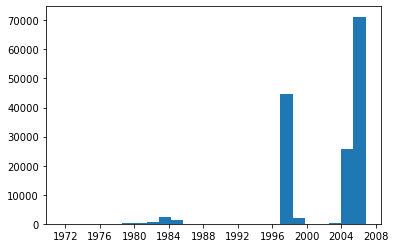

In [106]:
plt.hist(dt['ApprovalDate'], bins=25)

In [107]:
dt['ApprovalDate']=np.where(dt['ApprovalDate'] < '1997', dt['ApprovalDate'].mode(), dt['ApprovalDate'])

In [108]:
dt['ApprovalDate']=np.where(dt['ApprovalDate'] > '2007', dt['ApprovalDate'].mode(), dt['ApprovalDate'])

(array([1.5684e+04, 1.8821e+04, 1.3551e+04, 3.2140e+03, 2.4000e+01,
        1.4000e+01, 1.1000e+01, 1.2000e+01, 1.6000e+01, 6.0000e+00,
        2.5000e+01, 7.3000e+01, 0.0000e+00, 0.0000e+00, 9.0000e+00,
        9.9000e+01, 1.4300e+02, 1.7300e+02, 7.9400e+02, 7.6660e+03,
        1.2905e+04, 1.3721e+04, 1.4742e+04, 2.9449e+04, 1.7633e+04]),
 array([ 9920.  , 10061.24, 10202.48, 10343.72, 10484.96, 10626.2 ,
        10767.44, 10908.68, 11049.92, 11191.16, 11332.4 , 11473.64,
        11614.88, 11756.12, 11897.36, 12038.6 , 12179.84, 12321.08,
        12462.32, 12603.56, 12744.8 , 12886.04, 13027.28, 13168.52,
        13309.76, 13451.  ]),
 <BarContainer object of 25 artists>)

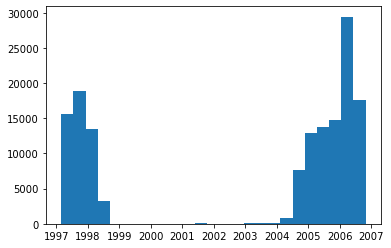

In [109]:
plt.hist(dt['ApprovalDate'], bins=25)

In [110]:
dt['ApprovalDate'].value_counts()

1997-09-30    5249
2006-03-17     421
2006-03-24     419
1997-04-01     418
2006-03-31     407
              ... 
2004-05-13       1
1998-09-23       1
2000-08-15       1
2003-09-15       1
1998-09-10       1
Name: ApprovalDate, Length: 1393, dtype: int64

In [111]:
dt['ApprovalFY'].value_counts()

2006    55017
2005    32995
1997    23796
1998    22699
2004     5542
2007     3525
1984     1923
1983     1541
1982      515
1981      368
2003      255
1985      148
1980      129
2001      100
1979       97
1999       40
1978       37
2000       34
1972       21
1973        3
Name: ApprovalFY, dtype: int64

In [112]:
dt['ApprovalFY']=np.where(dt['ApprovalFY'] < 1997, dt['ApprovalFY'].mode(), dt['ApprovalFY'])

In [113]:
dt['ApprovalFY']=np.where(dt['ApprovalFY'] > 2006, dt['ApprovalFY'].mode(), dt['ApprovalFY'])

(array([2.3796e+04, 0.0000e+00, 2.2699e+04, 0.0000e+00, 0.0000e+00,
        4.0000e+01, 0.0000e+00, 0.0000e+00, 3.4000e+01, 0.0000e+00,
        0.0000e+00, 1.0000e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.5500e+02, 0.0000e+00, 0.0000e+00, 5.5420e+03,
        0.0000e+00, 0.0000e+00, 3.2995e+04, 0.0000e+00, 6.3324e+04]),
 array([1997.  , 1997.36, 1997.72, 1998.08, 1998.44, 1998.8 , 1999.16,
        1999.52, 1999.88, 2000.24, 2000.6 , 2000.96, 2001.32, 2001.68,
        2002.04, 2002.4 , 2002.76, 2003.12, 2003.48, 2003.84, 2004.2 ,
        2004.56, 2004.92, 2005.28, 2005.64, 2006.  ]),
 <BarContainer object of 25 artists>)

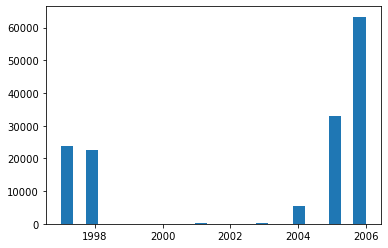

In [114]:
plt.hist(dt['ApprovalFY'], bins=25)

In [115]:
dt['ApprovalFY'].value_counts()

2006    63324
2005    32995
1997    23796
1998    22699
2004     5542
2003      255
2001      100
1999       40
2000       34
Name: ApprovalFY, dtype: int64

In [116]:
dt['DisbursementDate']=pd.to_datetime(dt['DisbursementDate'])

(array([2.4000e+01, 0.0000e+00, 2.3100e+02, 1.7840e+03, 2.7320e+03,
        1.0000e+01, 0.0000e+00, 1.0000e+00, 4.3821e+04, 2.7000e+03,
        2.3986e+04, 7.2085e+04, 1.3990e+03, 1.1000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  571.  ,  1698.12,  2825.24,  3952.36,  5079.48,  6206.6 ,
         7333.72,  8460.84,  9587.96, 10715.08, 11842.2 , 12969.32,
        14096.44, 15223.56, 16350.68, 17477.8 , 18604.92, 19732.04,
        20859.16, 21986.28, 23113.4 , 24240.52, 25367.64, 26494.76,
        27621.88, 28749.  ]),
 <BarContainer object of 25 artists>)

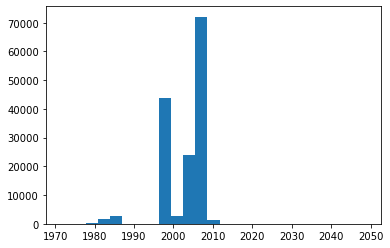

In [117]:
plt.hist(dt['DisbursementDate'], bins=25)

In [118]:
#dt['DisbursementDate'].value_counts()
dt['DisbursementDate'].mode()[0]

Timestamp('2006-05-31 00:00:00')

In [119]:
dt['DisbursementDate']=np.where(dt['DisbursementDate'] < '1997', dt['DisbursementDate'].mode(), dt['DisbursementDate'])

In [120]:
dt['DisbursementDate']=np.where(dt['DisbursementDate'] > '2006', dt['DisbursementDate'].mode(), dt['DisbursementDate'])

(array([2.8040e+03, 1.2765e+04, 1.0782e+04, 1.2184e+04, 3.1400e+03,
        2.1450e+03, 1.0850e+03, 5.0200e+02, 3.0600e+02, 3.6000e+02,
        1.3500e+02, 1.5300e+02, 9.5000e+01, 5.3000e+01, 7.3000e+01,
        6.8000e+01, 1.0800e+02, 9.1000e+01, 1.7800e+02, 3.3600e+02,
        6.2220e+03, 9.0420e+03, 1.3521e+04, 1.2289e+04, 6.0348e+04]),
 array([ 9906.  , 10041.72, 10177.44, 10313.16, 10448.88, 10584.6 ,
        10720.32, 10856.04, 10991.76, 11127.48, 11263.2 , 11398.92,
        11534.64, 11670.36, 11806.08, 11941.8 , 12077.52, 12213.24,
        12348.96, 12484.68, 12620.4 , 12756.12, 12891.84, 13027.56,
        13163.28, 13299.  ]),
 <BarContainer object of 25 artists>)

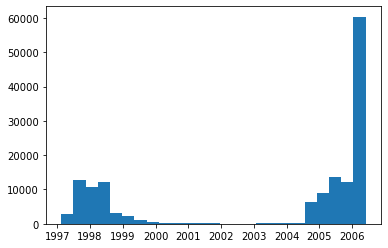

In [121]:
plt.hist(dt['DisbursementDate'], bins=25)

In [122]:
dt['ChgOffPrinGr'].describe()

count    1.487850e+05
mean     1.507230e+04
std      5.709595e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.318000e+03
max      1.999999e+06
Name: ChgOffPrinGr, dtype: float64

In [123]:
dt['ChgOffPrinGr'] = np.where(dt['ChgOffPrinGr'] > 74971 , dt['ChgOffPrinGr'].mode()[0], dt['ChgOffPrinGr'])

In [124]:
dt=dt.rename(columns={'ChgOffPrinGr':'Chg_Off_Amt'})

In [125]:
dt.dtypes

Name                         object
State                        object
Bank                         object
BankState                    object
ApprovalDate         datetime64[ns]
ApprovalFY                    int64
Term                          int64
NoEmp                         int64
NewExist                      int64
CreateJob                     int64
RetainedJob                   int64
FranchiseCode                 int64
UrbanRural                    int64
RevLineCr                     int64
LowDoc                        int64
DisbursementDate     datetime64[ns]
DisbursementGross             int32
BalanceGross                  int32
MIS_Status                    int64
Chg_Off_Amt                   int32
GrAppv                        int32
SBA_Appv                      int32
dtype: object

In [126]:
dt['UrbanRural']=dt['UrbanRural'].map({ 0: 'Undefined', 1: 'Urban', 2: 'Rural'})

In [127]:
dt['UrbanRural'].value_counts()

Urban        81030
Undefined    51211
Rural        16544
Name: UrbanRural, dtype: int64

In [128]:
dt.dtypes

Name                         object
State                        object
Bank                         object
BankState                    object
ApprovalDate         datetime64[ns]
ApprovalFY                    int64
Term                          int64
NoEmp                         int64
NewExist                      int64
CreateJob                     int64
RetainedJob                   int64
FranchiseCode                 int64
UrbanRural                   object
RevLineCr                     int64
LowDoc                        int64
DisbursementDate     datetime64[ns]
DisbursementGross             int32
BalanceGross                  int32
MIS_Status                    int64
Chg_Off_Amt                   int32
GrAppv                        int32
SBA_Appv                      int32
dtype: object

In [129]:
dt.to_csv("Lp_AnalysedData.csv")

In [130]:
os.getcwd()

'C:\\Users\\RASHMI'

# Plots and Graphs

In [ ]:
sns.pairplot(dt)

In [ ]:
corelation=dt.corr()

In [ ]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True, cmap='coolwarm')

In [ ]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

In [ ]:
dt.corr(method ='pearson')

In [ ]:
sns.pairplot(
   dt,
    x_vars=["SBA_Appv", "GrAppv", "DisbursementGross"],
    y_vars=["SBA_Appv","GrAppv","DisbursementGross"],
)

In [ ]:
sns.countplot(dt.MIS_Status)

In [ ]:
sns.countplot(dt.RevLineCr)

In [ ]:
sns.countplot(dt.LowDoc)

In [ ]:
sns.countplot(dt.UrbanRural)

In [ ]:
dt['UrbanRural'].unique()